# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 3.1 Contents<a id='3.1_Contents'></a>
* [3 Exploratory Data Analysis](#3_Exploratory_Data_Analysis)
  * [3.1 Contents](#3.1_Contents)
  * [3.2 Introduction](#3.2_Introduction)
  * [3.3 Imports](#3.3_Imports)
  * [3.4 Load The Data](#3.4_Load_The_Data)
    * [3.4.1 Load Cleaned Denver Airbnb](#3.4.1_Load_Cleaned_Denver_Airbnb)
    * [3.4.2 Load Cleaned Denver Summary](#3.4.2_Load_Cleaned_Denver_Summary)
  * [3.5 Explore The Data](#3.5_Explore_The_Data)
    * [3.5.1 Top Area by order Summary Statistics](#3.5.1_To_Area_by_order_Summary_Statistics)
      * [3.5.1.1 area_mean_review_scores_rating per Area](#3.5.1.1_area_mean_review_scores_rating_per_Area)
      * [3.5.1.2 area_mean_review_scores_location per Area](#3.5.1.2_area_mean_review_scores_location_per_Area)
      * [3.5.1.3 Total Population per Area](#3.5.1.3_Total_Population_per_Area)
      * [3.5.1.4 area_id_number per Area](#3.5.1.4_area_id_number_per_Area)
      * [3.5.1.5 area_mean_bedrooms per Area](#3.5.1.5_area_mean_bedrooms_per_Area)
      * [3.5.1.6 area_sum_number_of_reviews per Area](#3.5.1.6_area_sum_number_of_reviews_per_Area)
    * [3.5.2 Visualizing High Dimensional Data](#3.5.2_Visualizing_High_Dimensional_Data)
      * [3.5.2.1 Scale the data](#3.5.2.1_Scale_the_data)
        * [3.5.2.1.1 Verifying the scaling](#3.5.2.1.1_Verifying_the_scaling)
      * [3.5.2.2 Calculate the PCA transformation](#3.5.2.2_Calculate_the_PCA_transformation)
        * [3.5.2.2.1 Average Price by Area](#3.5.2.2.1_Average_Price_by_Area)
        * [3.5.2.2.2 Adding Average Price and Quartile to Scatter Plot](#3.5.2.2.2_Adding_Average_Price_and_Quartile_to_Scatter_Plot)
      * [3.5.2.3 Feature Correlation Heatmap](#3.5.2.3_Feature_Correlation_Heatmap)
    * [3.5.3 Explore Price with other Features](#3.5.3_Explore_Price_with_other_Features)
        * [3.5.3.1 Explore Price by Room Type](#3.5.2.2.1_Explore_Price_by_Room_Type)
        * [3.5.3.2 Explore Price and Room Type by Area](#3.5.2.2.1_Explore_Price_and_Room_Type_by_Area)
        * [3.5.3.3 Log Price Distribution Plot](#3.5.2.2.1_Log_Price_Distribution_Plot)
        * [3.5.3.4 Probability Plot](#3.5.2.2.1_Probability_Plot)        
  * [3.6 Summary](#3.6_Summary)


## 3.2 Introduction<a id='3.2_Introduction'></a>

At this point, you should have a firm idea of what your data science problem is and have the data you believe could help solve it. The business problem was a general one of modeling airbnb price and revenue. The data you started with contained some price values, but with a number of missing values that led to several rows being dropped completely. There were also some obvious issues with some of the other features in the data that, for example, led to one column being completely dropped, a data error corrected, and some other rows dropped. You also obtained some additional Denver population and size data with which to augment the dataset, which also required some cleaning.

The data science problem you subsequently identified is to predict the price for renting airbnb.

## 3.3 Imports<a id='3.3_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from scipy import stats

#from library.sb_utils import save_file

## 3.4 Load The Data<a id='3.4_Load_The_Data'></a>

### 3.4.1 Load Cleaned Denver Airbnb<a id='3.4.1_Load_Cleaned_Denver_Airbnb'></a>

In [2]:
airbnb_denver = pd.read_csv('airbnb_denver_clean.csv')

In [3]:
airbnb_denver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4889 entries, 0 to 4888
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   4889 non-null   int64  
 1   id                           4889 non-null   float64
 2   description                  4889 non-null   object 
 3   host_id                      4889 non-null   int64  
 4   area                         4889 non-null   object 
 5   latitude                     4889 non-null   float64
 6   longitude                    4889 non-null   float64
 7   property_type                4889 non-null   object 
 8   room_type                    4889 non-null   object 
 9   bathrooms                    4887 non-null   float64
 10  bedrooms                     4826 non-null   float64
 11  number_of_reviews            4889 non-null   int64  
 12  last_scraped                 4889 non-null   object 
 13  review_scores_rati

In [4]:
airbnb_denver.head()

,Unnamed: 0,id,description,host_id,area,latitude,longitude,property_type,room_type,bathrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,price,home_type
0,0,6.070000e+17,Home in Denver · 1 bedroom · 1 bed · 1 shared ...,430149575,North Park Hill,39.760390,-104.92968,Private room in home,Private room,1.0,...,3.00,2.50,2.50,3.00,3.50,4.00,3.00,0.11,35.0,Home
1,1,5.460000e+17,Rental unit in Denver · 2 bedrooms · 3 beds · ...,169214047,Hale,39.727850,-104.93783,Entire rental unit,Entire home/apt,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149.0,Rental
2,3,5.242953e+07,Townhouse in Denver · ★4.78 · 3 bedrooms · 4 b...,107279139,Five Points,39.758520,-104.98846,Entire townhouse,Entire home/apt,2.5,...,4.78,4.88,4.62,4.78,4.78,4.93,4.59,2.52,190.0,Townhouse
3,4,6.320000e+17,Townhouse in Denver · ★New · 2 bedrooms · 2 be...,416194740,West Colfax,39.736019,-105.05072,Entire townhouse,Entire home/apt,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.0,Townhouse
4,5,6.880000e+17,Home in Denver · ★5.0 · 2 bedrooms · 2 beds · ...,133612752,Sunnyside,39.771430,-105.02028,Entire home,Entire home/apt,1.0,...,5.00,5.00,5.00,5.00,5.00,4.92,4.92,0.99,300.0,Home


### 3.4.2 Load Cleaned Denver Summary<a id='3.4.2_Load_Cleaned_Denver_Summary'></a>

In [5]:
denver_summary = pd.read_csv('denver_summary_clean.csv')

In [6]:
denver_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        76 non-null     int64  
 1   area                              76 non-null     object 
 2   area_id_number                    76 non-null     int64  
 3   area_mean_review_scores_rating    76 non-null     float64
 4   area_mean_review_scores_location  76 non-null     float64
 5   area_mean_bedrooms                76 non-null     float64
 6   area_sum_number_of_reviews        76 non-null     int64  
 7   area_mean_price                   76 non-null     float64
 8   population                        76 non-null     int64  
 9   region_area_sq_miles              76 non-null     float64
dtypes: float64(5), int64(4), object(1)
memory usage: 6.1+ KB


In [7]:
denver_summary.head()

,Unnamed: 0,area,area_id_number,area_mean_review_scores_rating,area_mean_review_scores_location,area_mean_bedrooms,area_sum_number_of_reviews,area_mean_price,population,region_area_sq_miles
0,0,Athmar Park,55,4.832766,4.713191,2.444444,1952,142.472727,8898,1.53
1,1,Auraria,4,4.996667,4.996667,1.750000,90,163.750000,705,0.32
2,2,Baker,118,4.815963,4.846330,1.846154,6018,122.119658,4879,1.26
3,3,Barnum,34,4.769259,4.658148,2.176471,1043,121.264706,6111,1.47
4,4,Barnum West,26,4.834545,4.713182,2.115385,1330,115.230769,5376,0.74


## 3.5 Explore The Data<a id='3.5_Explore_The_Data'></a>

### 3.5.1 Top Area by order Summary Statistics<a id='3.5.1_Top_Area_by_order_Summary_Statistics'></a>

I Set the area as index

In [8]:
denver_summary = denver_summary.set_index('area')

In [9]:
index_values = denver_summary.index.to_numpy()
index_values

array(['Athmar Park', 'Auraria', 'Baker', 'Barnum', 'Barnum West',
       'Bear Valley', 'Belcaro', 'Berkeley', 'CBD', 'Capitol Hill',
       'Chaffee Park', 'Cheesman Park', 'Cherry Creek', 'City Park',
       'City Park West', 'Civic Center', 'Clayton', 'Cole',
       'Congress Park', 'Cory - Merrill', 'Country Club', 'DIA',
       'East Colfax', 'Elyria Swansea', 'Five Points', 'Fort Logan',
       'Globeville', 'Goldsmith', 'Hale', 'Hampden', 'Hampden South',
       'Harvey Park', 'Harvey Park South', 'Highland', 'Hilltop',
       'Indian Creek', 'Jefferson Park', 'Lincoln Park', 'Lowry Field',
       'Mar Lee', 'Marston', 'Montbello', 'Montclair',
       'North Capitol Hill', 'North Park Hill', 'Northeast Park Hill',
       'Overland', 'Platt Park', 'Regis', 'Rosedale', 'Ruby Hill',
       'Skyland', 'Sloan Lake', 'South Park Hill', 'Southmoor Park',
       'Speer', 'Stapleton', 'Sun Valley', 'Sunnyside', 'Union Station',
       'University', 'University Hills', 'University Park',

In [10]:
denver_summary.head()
denver_summary.drop(columns='Unnamed: 0', inplace=True)
denver_summary.head()

,area_id_number,area_mean_review_scores_rating,area_mean_review_scores_location,area_mean_bedrooms,area_sum_number_of_reviews,area_mean_price,population,region_area_sq_miles
area,,,,,,,,
Athmar Park,55,4.832766,4.713191,2.444444,1952,142.472727,8898,1.53
Auraria,4,4.996667,4.996667,1.750000,90,163.750000,705,0.32
Baker,118,4.815963,4.846330,1.846154,6018,122.119658,4879,1.26
Barnum,34,4.769259,4.658148,2.176471,1043,121.264706,6111,1.47
Barnum West,26,4.834545,4.713182,2.115385,1330,115.230769,5376,0.74


#### 3.5.1.1 area_mean_review_scores_rating per Area<a id='3.5.1.1_area_mean_review_scores_rating_per_Area'></a>

In [11]:
denver_summary.area_mean_review_scores_rating.sort_values(ascending=False).head()

area
Auraria            4.996667
Southmoor Park     4.975000
Lowry Field        4.955000
Globeville         4.938889
University Park    4.938571
Name: area_mean_review_scores_rating, dtype: float64

#### 3.5.1.2 area_mean_review_scores_location per Area<a id='3.5.1.2_area_mean_review_scores_location_per_Area'></a>

In [12]:
denver_summary.area_mean_review_scores_location.sort_values(ascending=False).head()

area
Auraria            4.996667
Country Club       4.985455
Washington Park    4.973871
Lowry Field        4.972000
Belcaro            4.957000
Name: area_mean_review_scores_location, dtype: float64

#### 3.5.1.3 Total Population per Area<a id='3.5.1.2_Total_Population_per_Area'></a>

In [13]:
denver_summary.population.sort_values(ascending=False).head()

area
Montbello                       30348
Gateway / Green Valley Ranch    29201
Hampden                         17547
Westwood                        15486
Capitol Hill                    14708
Name: population, dtype: int64

#### 3.5.1.4 area_id_number per Area<a id='3.5.1.4_area_id_number_per_Area'></a>

In [14]:
denver_summary.area_id_number.sort_values(ascending=False).head()

area
Five Points                     415
Highland                        298
West Colfax                     226
Union Station                   198
Gateway / Green Valley Ranch    177
Name: area_id_number, dtype: int64

#### 3.5.1.5 area_mean_bedrooms per Area<a id='3.5.1.5_area_mean_bedrooms_per_Area'></a>

In [15]:
denver_summary.area_mean_bedrooms.sort_values(ascending=False).head()

area
University Park     3.600000
Hilltop             3.000000
Hampden             2.954545
Windsor             2.875000
University Hills    2.794118
Name: area_mean_bedrooms, dtype: float64

#### 3.5.1.6 area_sum_number_of_reviews per Area<a id='3.5.1.6_area_sum_number_of_reviews_Per_Area'></a>

In [16]:
denver_summary.area_sum_number_of_reviews.sort_values(ascending=False).head()

area
Five Points      35052
Highland         21690
Capitol Hill     12094
Berkeley         10745
West Highland    10459
Name: area_sum_number_of_reviews, dtype: int64

### 3.5.2 Visualizing High Dimensional Data<a id='3.5.2_Visualizing_High_Dimensional_Data'></a>

Some regions are higher in some but not in others. Some features will also be more correlated with one another than others.

One way to disentangle this interconnected web of relationships is via [principle components analysis](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA) (PCA). This technique will find linear combinations of the original features that are uncorrelated with one another and order them by the amount of variance they explain.

The basic steps in this process are:

1. scale the data (important here because our features are heterogenous)
2. fit the PCA transformation (learn the transformation from the data)
3. apply the transformation to the data to create the derived features
4. (optionally) use the derived features to look for patterns in the data and explore the coefficients

#### 3.5.2.1 Scale the data<a id='3.5.2.1_Scale_the_data'></a>

I only want numeric data here, although you don't want to lose track of the region labels, so it's convenient to set the area as the index.

In [17]:
denver_summary_scale = denver_summary
denver_summary_scale_index = denver_summary_scale.index
denver_summary_scale_columns = denver_summary_scale.columns
denver_summary_scale.head()

,area_id_number,area_mean_review_scores_rating,area_mean_review_scores_location,area_mean_bedrooms,area_sum_number_of_reviews,area_mean_price,population,region_area_sq_miles
area,,,,,,,,
Athmar Park,55,4.832766,4.713191,2.444444,1952,142.472727,8898,1.53
Auraria,4,4.996667,4.996667,1.750000,90,163.750000,705,0.32
Baker,118,4.815963,4.846330,1.846154,6018,122.119658,4879,1.26
Barnum,34,4.769259,4.658148,2.176471,1043,121.264706,6111,1.47
Barnum West,26,4.834545,4.713182,2.115385,1330,115.230769,5376,0.74


Now use `scale()` to scale the data.

In [18]:
denver_summary_scale = scale(denver_summary_scale)

`scale()` returns an ndarray. I want to visualise scaled data, I already copied the column names. Now I can construct a dataframe from the ndarray here and reintroduce the column names.

In [19]:
df_denver_summary_scale = pd.DataFrame(denver_summary_scale, columns=denver_summary_scale_columns)
df_denver_summary_scale.head()

,area_id_number,area_mean_review_scores_rating,area_mean_review_scores_location,area_mean_bedrooms,area_sum_number_of_reviews,area_mean_price,population,region_area_sq_miles
0,-0.148511,-0.084651,-0.842553,0.610768,-0.368682,-0.408313,0.220896,-0.138582
1,-0.876235,1.620854,1.429797,-1.291923,-0.720698,-0.191798,-1.359132,-0.331497
2,0.750441,-0.259494,0.224693,-1.028474,0.400005,-0.615424,-0.554172,-0.181629
3,-0.448162,-0.745484,-1.283783,-0.123447,-0.540531,-0.624124,-0.316580,-0.148148
4,-0.562315,-0.066134,-0.842631,-0.290815,-0.486273,-0.685524,-0.458325,-0.264534


##### 3.5.2.1.1 Verifying the scaling<a id='3.5.2.1.1_Verifying_the_scaling'></a>

First of all, check the mean of the scaled features using panda's `mean()` DataFrame method.

In [20]:
df_denver_summary_scale.mean()

area_id_number                     -5.551115e-17
area_mean_review_scores_rating     -4.987239e-15
area_mean_review_scores_location   -5.895869e-15
area_mean_bedrooms                 -1.341033e-15
area_sum_number_of_reviews         -1.460820e-17
area_mean_price                     6.591949e-17
population                          5.843279e-17
region_area_sq_miles               -5.258951e-17
dtype: float64

This is pretty much zero!

Perform a similar check for the standard deviation using pandas's `std()` DataFrame method.

In [21]:
df_denver_summary_scale.std()

area_id_number                      1.006645
area_mean_review_scores_rating      1.006645
area_mean_review_scores_location    1.006645
area_mean_bedrooms                  1.006645
area_sum_number_of_reviews          1.006645
area_mean_price                     1.006645
population                          1.006645
region_area_sq_miles                1.006645
dtype: float64

Well, this is a little embarrassing. The numbers should be closer to 1 than this! Check the documentation for [scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) to see if you used it right. What about [std](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html), did you mess up there? Is one of them not working right?

The keen observer, who already has some familiarity with statistical inference and biased estimators, may have noticed what's happened here. `scale()` uses the biased estimator for standard deviation (ddof=0). This doesn't mean it's bad! It simply means it calculates the standard deviation of the sample it was given. The `std()` method, on the other hand, defaults to using ddof=1, that is it's normalized by N-1. In other words, the `std()` method default is to assume you want your best estimate of the population parameter based on the given sample. You can tell it to return the biased estimate instead:

In [22]:
df_denver_summary_scale.std(ddof=0)

area_id_number                      1.0
area_mean_review_scores_rating      1.0
area_mean_review_scores_location    1.0
area_mean_bedrooms                  1.0
area_sum_number_of_reviews          1.0
area_mean_price                     1.0
population                          1.0
region_area_sq_miles                1.0
dtype: float64

There! Now it agrees with `scale()` and our expectation. This just goes to show different routines to do ostensibly the same thing can have different behaviours.

#### 3.5.2.2 Calculate the PCA transformation<a id='3.5.3.2_Calculate_the_PCA_transformation'></a>

Fit the PCA transformation using the scaled data.

In [23]:
area_pca = PCA().fit(df_denver_summary_scale)

Plot the cumulative variance ratio with number of components.

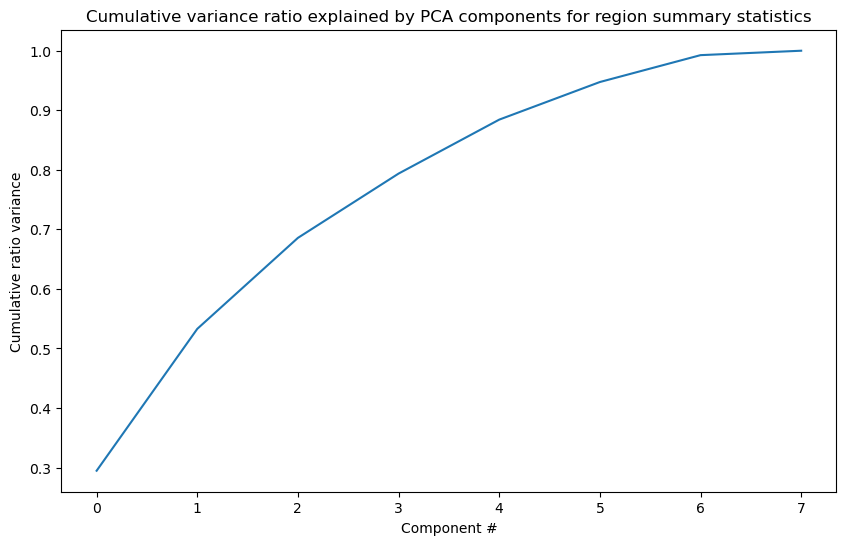

In [24]:
plt.subplots(figsize=(10, 6))
plt.plot(area_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for region summary statistics');

The first two components seem to account for over 60% of the variance, and the first four for over 80%.

Apply the transformation to the data to obtain the derived features.

In [25]:
area_pca_x = area_pca.transform(denver_summary_scale)

C:\Users\sepeh\anaconda33\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [26]:
area_pca_x.shape

(76, 8)

Plot the first two derived features (the first two principle components) and label each point with the name of the region.

Take a moment to familiarize yourself with the code below. It will extract the first and second columns from the transformed data (`state_pca_x`) as x and y coordinates for plotting. Recall the region labels you saved (for this purpose) for subsequent calls to `plt.annotate`. Grab the second (index 1) value of the cumulative variance ratio to include in your descriptive title; this helpfully highlights the percentage variance explained
by the two PCA components you're visualizing. Then create an appropriately sized and well-labelled scatterplot
to convey all of this information.

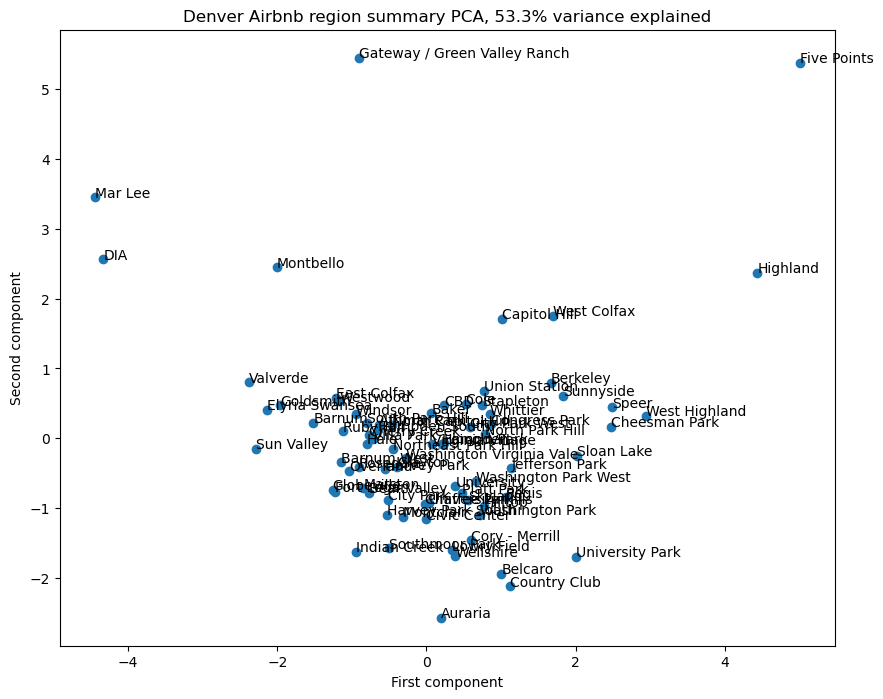

In [27]:
x = area_pca_x[:, 0]
y = area_pca_x[:, 1]
region = denver_summary_scale_index
pc_var = 100 * area_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'Denver Airbnb region summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(region, x, y):
    plt.annotate(s, (x, y))

#### 3.5.2.2.1 Average Price by Area<a id='3.5.2.2.1_Average_Price_by_Area'></a>

Here, all point markers for the regions are the same size and colour. You've visualized relationships between the regions based on features such as the total skiable terrain area, but your ultimate interest lies in prices. You know ticket prices in each region, so it might be interesting to see if there's any pattern there.

In [28]:
#Calculate the average 'Price' price by region
area_avg_price = airbnb_denver.groupby('area')['price'].mean()
area_avg_price.head()

area
Athmar Park    142.472727
Auraria        163.750000
Baker          122.119658
Barnum         121.264706
Barnum West    115.230769
Name: price, dtype: float64

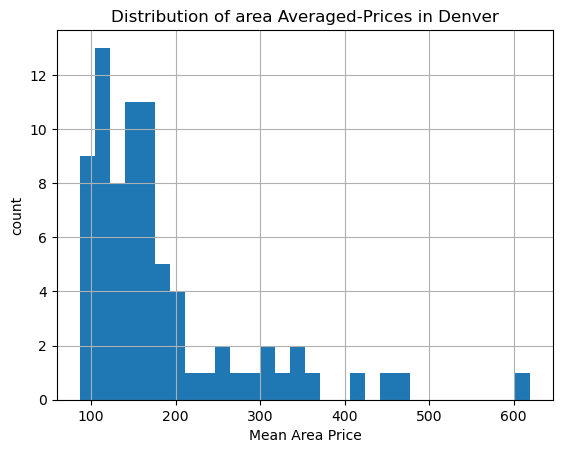

In [29]:
area_avg_price.hist(bins=30)
plt.title('Distribution of area Averaged-Prices in Denver')
plt.xlabel('Mean Area Price')
plt.ylabel('count');

#### 3.5.2.2.2 Adding Average Price and Quartile to Scatter Plot<a id='3.5.2.2.1_Adding_Average_Price_and_Quartile_to_Scatter_Plot'></a>

At this point I have several objects floating around. I have just calculated average price by region from our airbnb_denver, but I've been looking at principle components generated from other region airbnb summary data. I extracted indexes and column names from a dataframe and the first two principle components from an array. It's becoming a bit hard to keep track of them all. I'll create a new DataFrame to do this.

In [30]:
pca_df = pd.DataFrame({'PC1': area_pca_x[:, 0], 'PC2': area_pca_x[:, 1]}, index=denver_summary_scale_index)
pca_df.head()

,PC1,PC2
area,,
Athmar Park,-0.631692,0.192745
Auraria,0.194297,-2.569459
Baker,0.065226,0.357623
Barnum,-1.518348,0.221578
Barnum West,-1.144804,-0.339603


That worked, and I have reagion as an index.

In [31]:
area_avg_price.head()

area
Athmar Park    142.472727
Auraria        163.750000
Baker          122.119658
Barnum         121.264706
Barnum West    115.230769
Name: price, dtype: float64

In [32]:
area_avg_price.to_frame().head()

,price
area,
Athmar Park,142.472727
Auraria,163.750000
Baker,122.119658
Barnum,121.264706
Barnum West,115.230769


Now I can concatenate both parts on axis 1 and using the indexes.

In [33]:
pca_df = pd.concat([pca_df, area_avg_price], axis=1)
pca_df.head()

,PC1,PC2,price
area,,,
Athmar Park,-0.631692,0.192745,142.472727
Auraria,0.194297,-2.569459,163.750000
Baker,0.065226,0.357623,122.119658
Barnum,-1.518348,0.221578,121.264706
Barnum West,-1.144804,-0.339603,115.230769


I add another column where i seperate these prices into quartiles; that might show something.

In [34]:
pca_df['Quartile'] = pd.qcut(pca_df.price, q=4, precision=1)
pca_df.head()

,PC1,PC2,price,Quartile
area,,,,
Athmar Park,-0.631692,0.192745,142.472727,"(119.0, 156.3]"
Auraria,0.194297,-2.569459,163.750000,"(156.3, 194.7]"
Baker,0.065226,0.357623,122.119658,"(119.0, 156.3]"
Barnum,-1.518348,0.221578,121.264706,"(119.0, 156.3]"
Barnum West,-1.144804,-0.339603,115.230769,"(86.4, 119.0]"


In [35]:
pca_df.dtypes

PC1          float64
PC2          float64
price        float64
Quartile    category
dtype: object

Coding for missing values

Ploting PCA

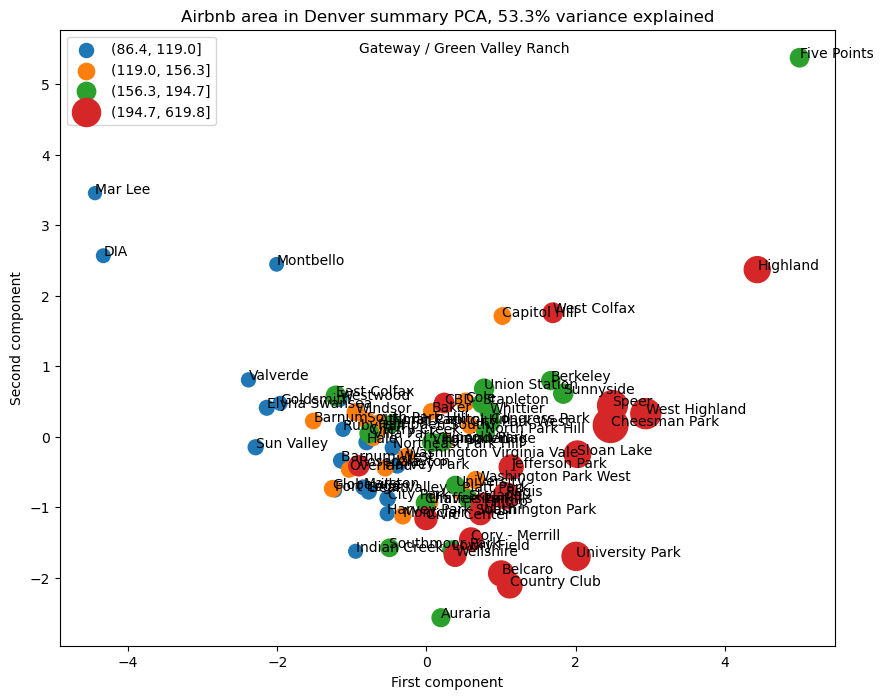

In [36]:
x = pca_df.PC1
y = pca_df.PC2
price = pca_df.price
quartiles = pca_df.Quartile
region = pca_df.index
pc_var = 100 * area_pca.explained_variance_ratio_.cumsum()[1]
fig, ax = plt.subplots(figsize=(10,8))
for q in quartiles.cat.categories:
    im = quartiles == q
    ax.scatter(x=x[im], y=y[im], s=price[im], label=q)
ax.set_xlabel('First component')
ax.set_ylabel('Second component')
plt.legend()
ax.set_title(f'Airbnb area in Denver summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(region, x, y):
    plt.annotate(s, (x, y))

Now, I see the same distribution of denver as before, but with additional information about the average price. There isn't an obvious pattern. The red points representing the upper quartile of price can be seen to the down, the right. There's also a spread of the other quartiles as well.

### 3.5.2.3 Feature Correlation Heatmap<a id='3.5.2.3_Feature_Correlation_Heatmap'></a>

A great way to gain a high level view of relationships amongst the features.

C:\Users\sepeh\AppData\Local\Temp\ipykernel_21192\3839862067.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = airbnb_denver.corr()


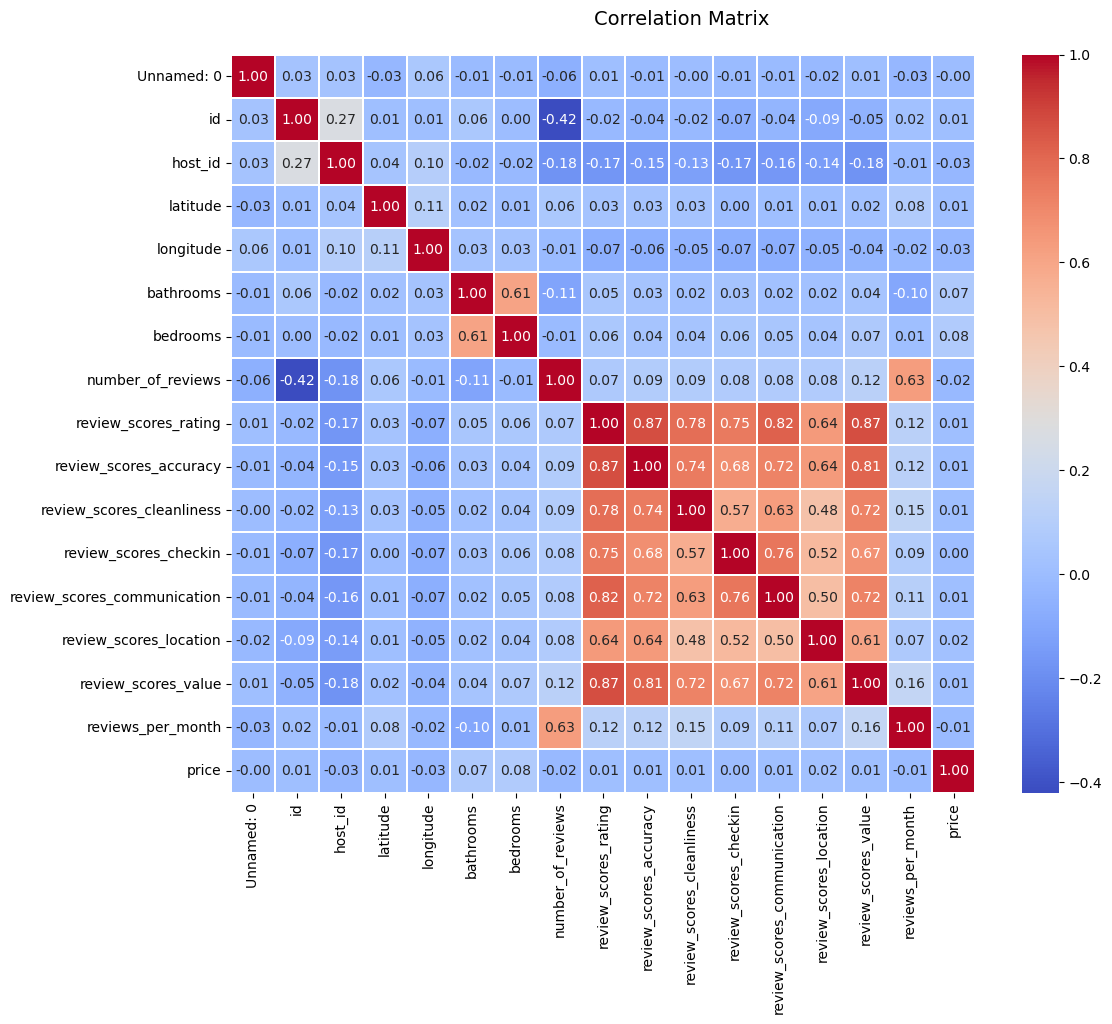

In [37]:
corrmat = airbnb_denver.corr()
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlation Matrix', fontsize=14)

There is a lot to take away from this. First, review scores and ratios that are given are quite highly correlated. This isn't a surprise. I can also see that I've introduced a lot of multicollinearity with your new ratio features.

### 3.5.3 Explore Price with other Features<a id='3.5.3_Explore_Price_with_other_Features'></a>

#### 3.5.3.1 Explore Price by Room Type<a id='3.5.3.1_Explore_Price_by_Room_Type'></a>

Text(0.5, 1.0, 'Room Type vs Price')

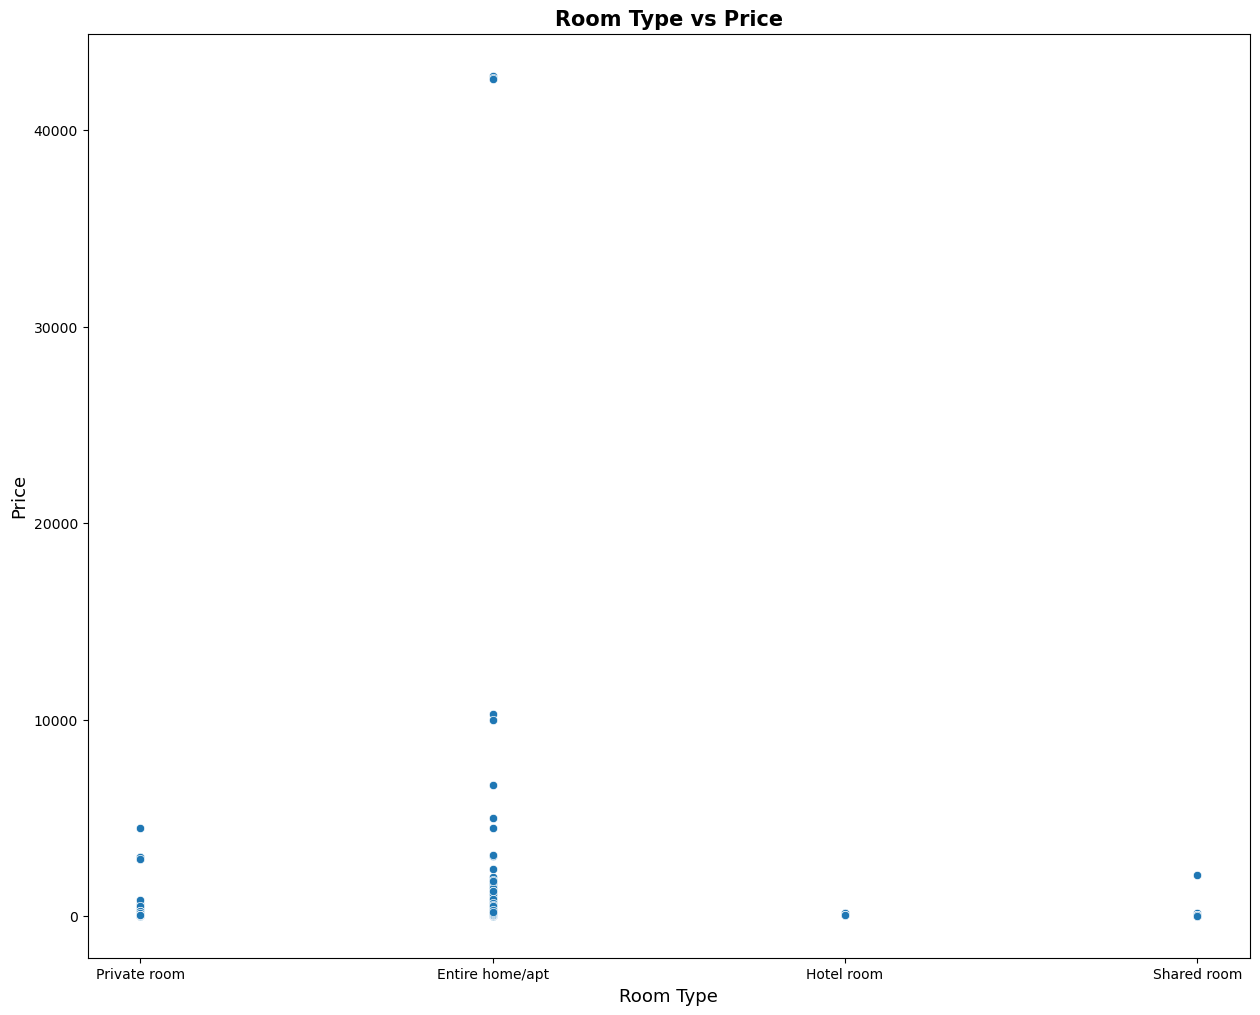

In [38]:
plt.figure(figsize=(15,12))
sns.scatterplot(x='room_type', y='price', data=airbnb_denver)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price",size=15, weight='bold')

#### 3.5.3.2 Explore Price and Room Type by Area<a id='3.5.3.2_Explore_Price_and_Room_Type_by_Area'></a>

Text(0.5, 1.0, 'Room Type vs Price vs Area')

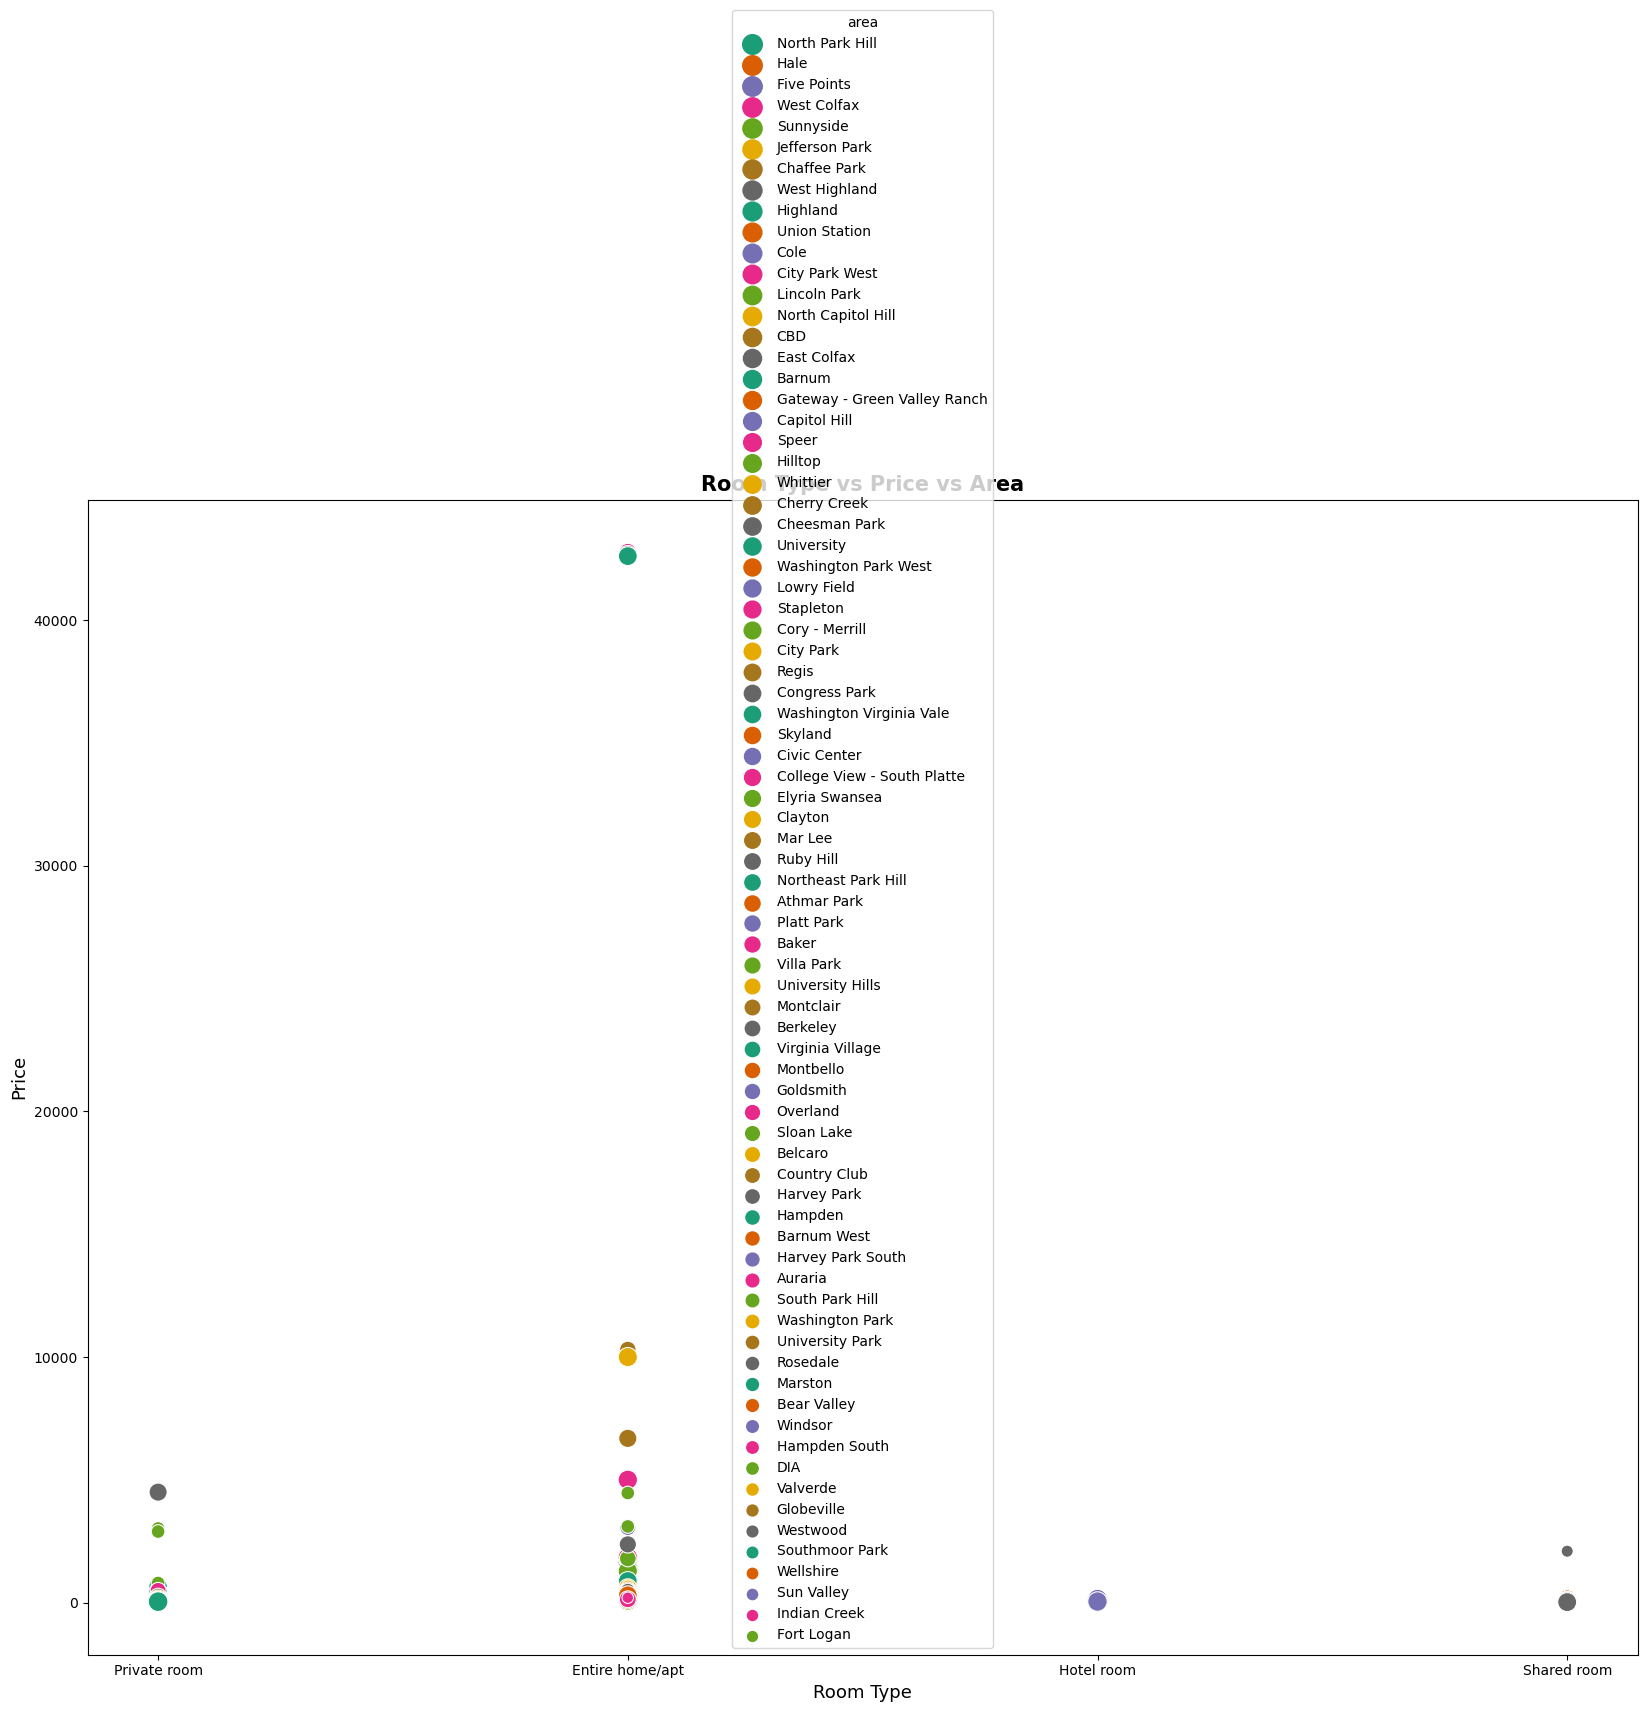

In [39]:
plt.figure(figsize=(20,15))
sns.scatterplot(x="room_type", y="price",
            hue="area", size="area",
            sizes=(50, 200), palette="Dark2", data=airbnb_denver)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price vs Area",size=15, weight='bold')

Another graph is about price vs number of reviews based on neighborhood group. It shows us the lowest prices have higher reviews than the higher prices. It shows negative correlation between price and number of reviews. Also North Park Hill, Hale, Five Points, West Colfax, and Sunnyside areas have higher reviews than others.

Text(0.5, 1.0, 'Price vs Number of Reviews vs Area')

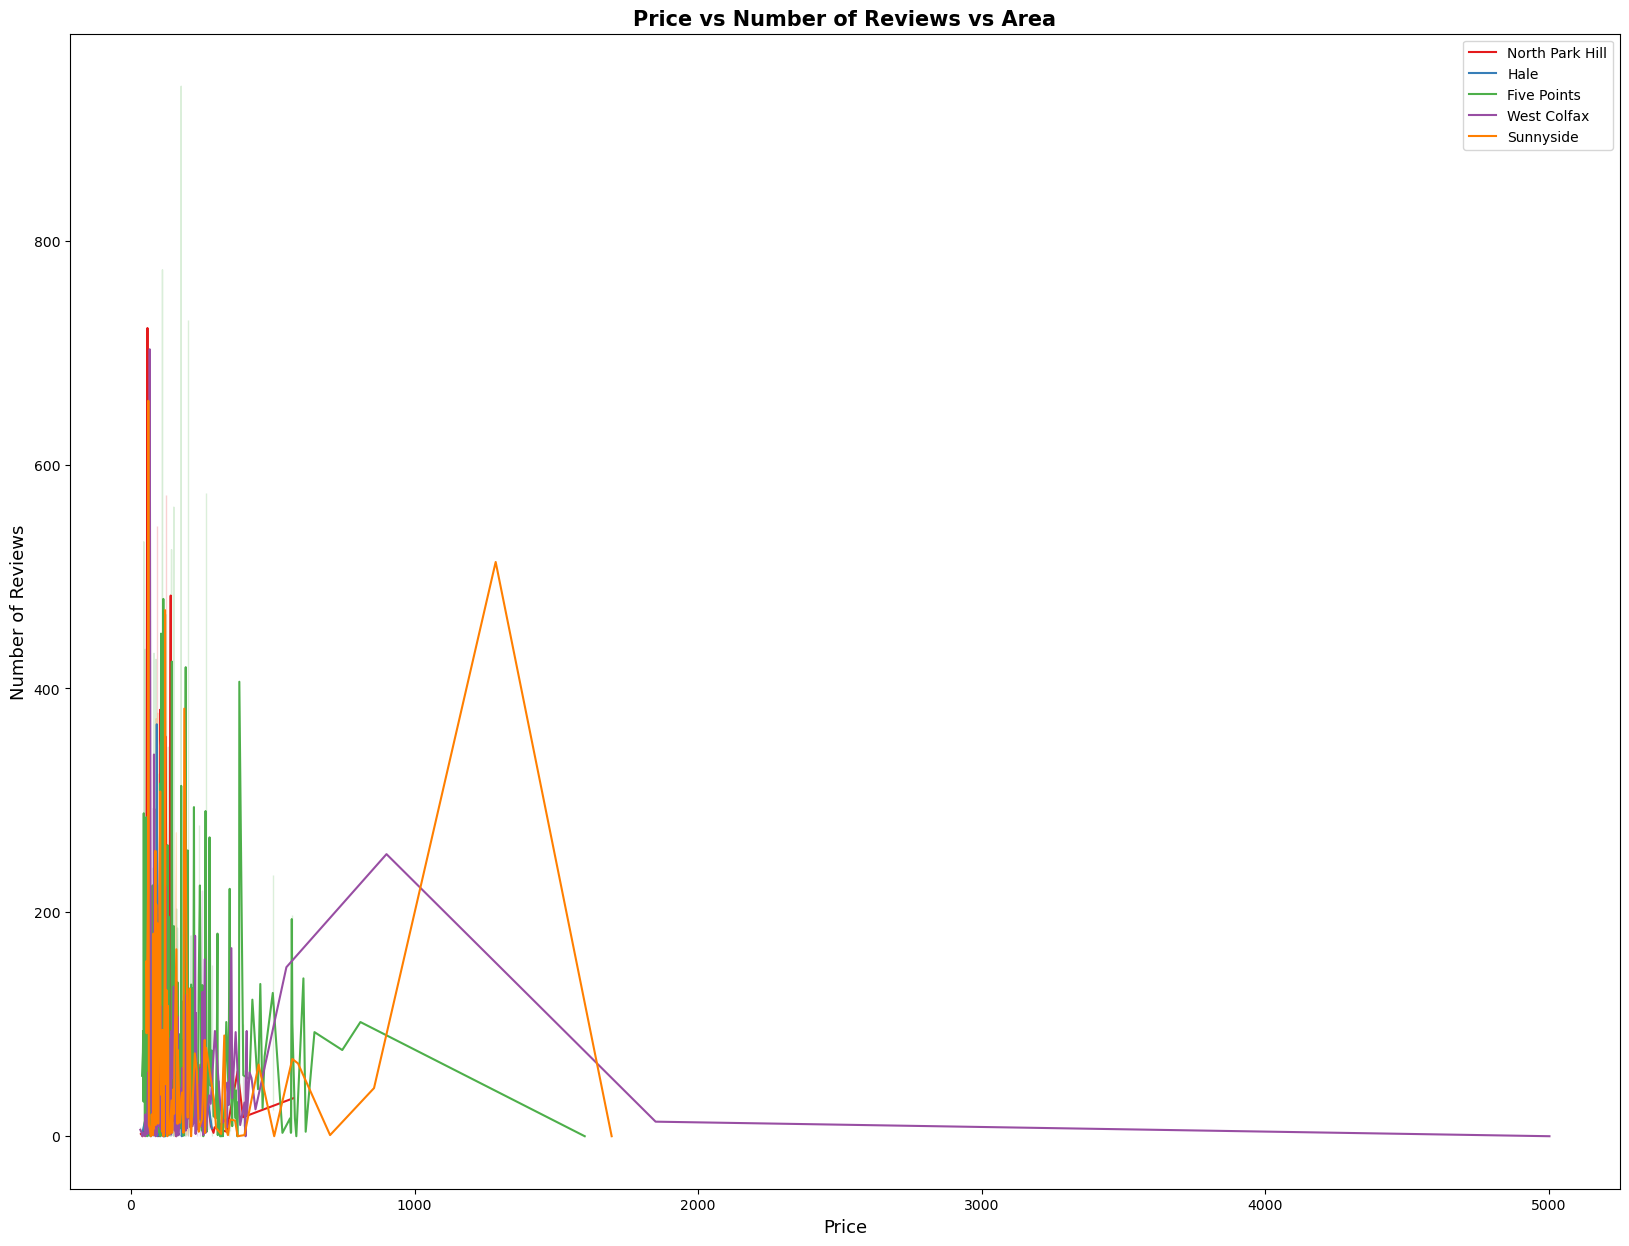

In [40]:
plt.figure(figsize=(20,15))
sns.set_palette("Set1")

sns.lineplot(x='price', y='number_of_reviews', 
             data=airbnb_denver[airbnb_denver['area']=='North Park Hill'],
             label='North Park Hill')
sns.lineplot(x='price', y='number_of_reviews', 
             data=airbnb_denver[airbnb_denver['area']=='Hale'],
             label='Hale')
sns.lineplot(x='price', y='number_of_reviews', 
             data=airbnb_denver[airbnb_denver['area']=='Five Points'],
             label='Five Points')
sns.lineplot(x='price', y='number_of_reviews', 
             data=airbnb_denver[airbnb_denver['area']=='West Colfax'],
             label='West Colfax')
sns.lineplot(x='price', y='number_of_reviews', 
             data=airbnb_denver[airbnb_denver['area']=='Sunnyside'],
             label='Sunnyside')
plt.xlabel("Price", size=13)
plt.ylabel("Number of Reviews", size=13)
plt.title("Price vs Number of Reviews vs Area",size=15, weight='bold')

#### 3.5.3.3 Log Price Distribution Plot<a id='3.5.3.3_Log_Price_Distribution_Plot'></a>

Text(0.5, 1.0, 'Price Distribution Plot')

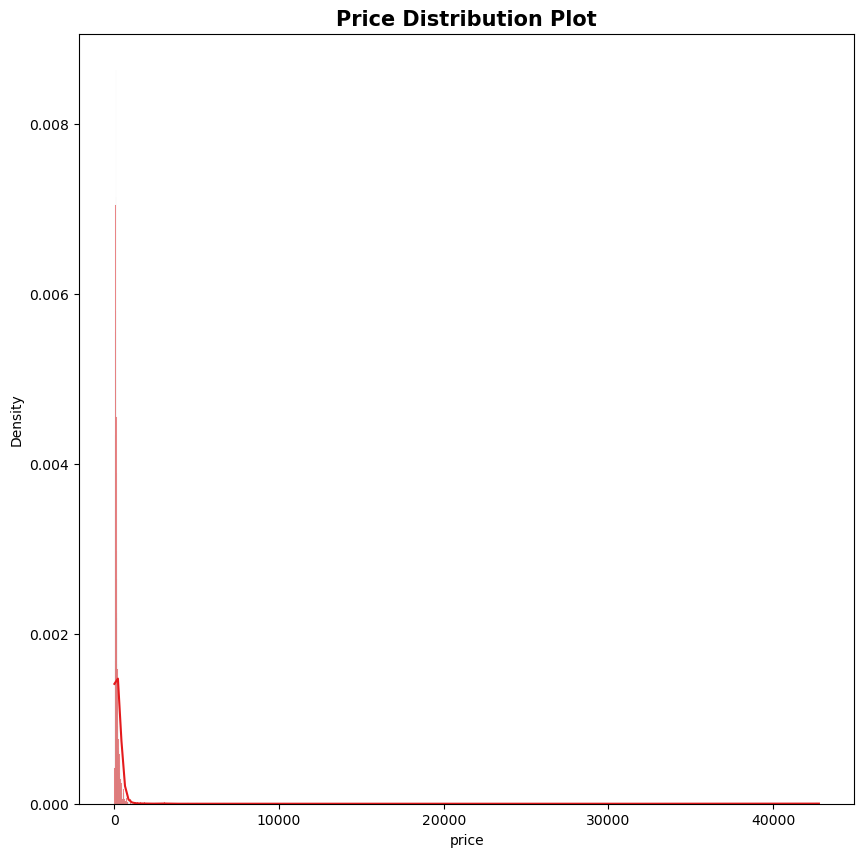

In [41]:
plt.figure(figsize=(10,10))
sns.histplot(airbnb_denver['price'],  kde=True, stat="density")
plt.title("Price Distribution Plot",size=15, weight='bold')

The above distribution graph shows that there is a right-skewed distribution on price. This means there is a positive skewness. Log transformation will be used to make this feature less skewed. This will help to make easier interpretation and better statistical analysis

Since division by zero is a problem, log+1 transformation would be better.

In [42]:
airbnb_denver['price_log'] = np.log(airbnb_denver.price+1)

Text(0.5, 1.0, 'Log-Price Distribution Plot')

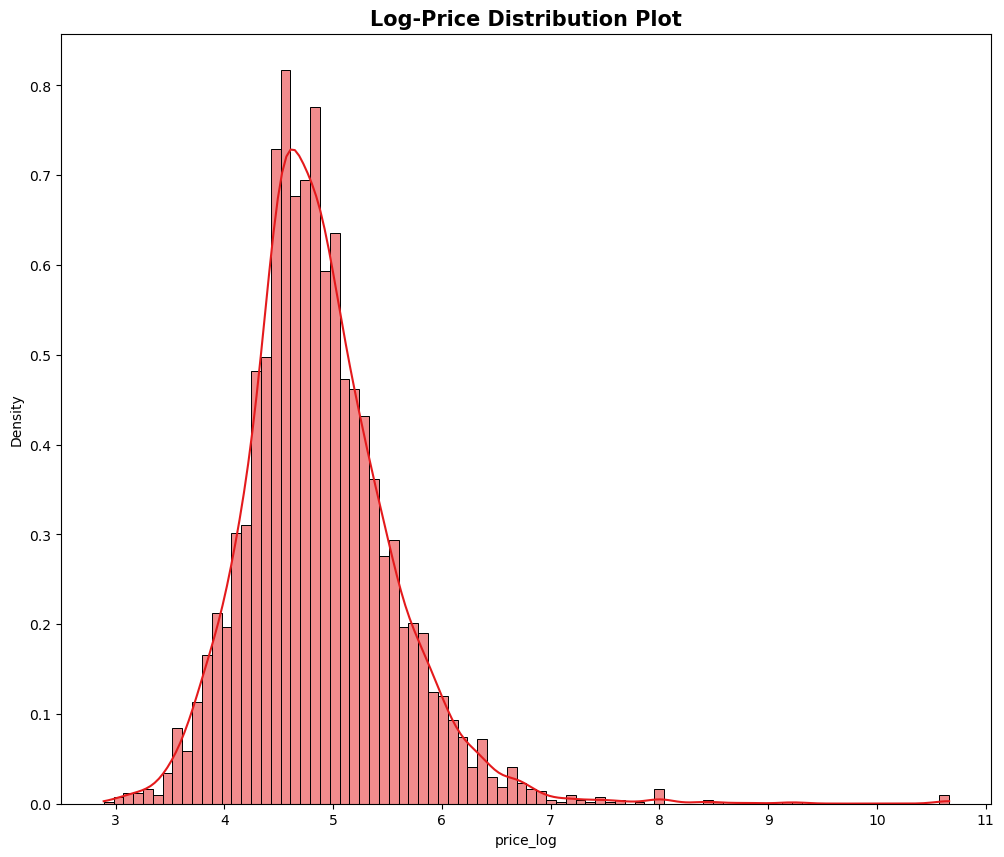

In [43]:
plt.figure(figsize=(12,10))
sns.histplot(airbnb_denver['price_log'], kde=True, stat="density")
plt.title("Log-Price Distribution Plot",size=15, weight='bold')

#### 3.5.3.4 Probability Plot<a id='3.5.3.4_Probability_Plot'></a>

 creates a normal probability plot comparing the distribution of the data in y to the normal distribution:

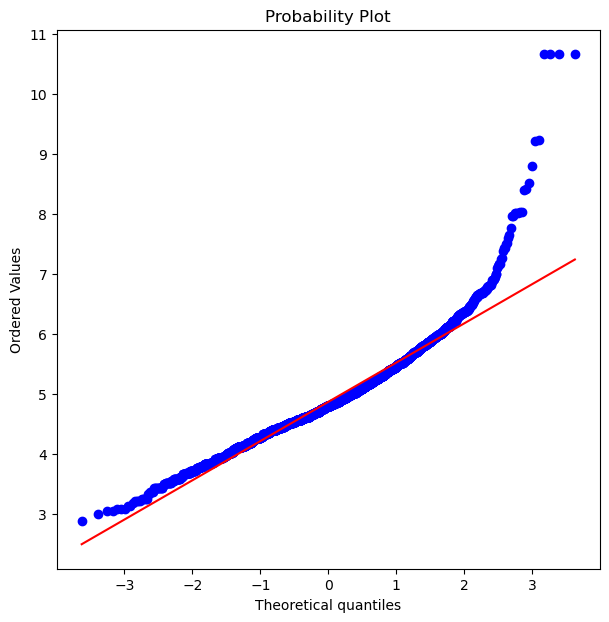

In [44]:
plt.figure(figsize=(7,7))
stats.probplot(airbnb_denver['price_log'], plot=plt)
plt.show()

## 3.6 Summary<a id='3.6_Summary'></a>

At this part, I explored the data to find the important feature. I ordered top features per areas like area_mean_review_scores_rating, area_mean_review_scores_location, Total Population, area_id_number, area_mean_bedrooms, area_sum_number_of_reviews per areas.
After that I tried to visualize high dimentional data. I used PCA transformation and heat map, because I could understand easily the story behind the data.
Then I compare price with other features. So I found out room type is a good feature that I will be able to use it later. 
I used log for price and make the probability plot that it gave me the good insight of data.

In [45]:
# Save the data 

airbnb_denver.to_csv('airbnb_denver_explored.csv')
denver_summary.to_csv('denver_summary_explored.csv')